<a href="https://colab.research.google.com/github/akshitgupta29/Hands-On-Machine-Learning/blob/main/Chapter_2_end_to_end_machine_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 2 – End-to-end Machine Learning project
### Linear Regression

Welcome to Machine Learning Housing Corp.! Your task is to predict median house values in Californian districts, given a number of features from these districts.




# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.


In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Get the data

In [ ]:
import pandas as pd
import os
import urllib.request
import tarfile
import pandas as pd

In [ ]:
#Getting the Dataset values
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data (housing_url = HOUSING_URL, housing_path = HOUSING_PATH):
  os.makedirs(housing_path, exist_ok = True)
  tgz_path = os.path.join (housing_path, "housing.tgz")
  urllib.request.urlretrieve (housing_url, tgz_path)
  housing_tgz = tarfile.open(tgz_path)
  housing_tgz.extractall(path=housing_path)
  housing_tgz.close()



In [ ]:
fetch_housing_data()

In [ ]:
#loading the dataset
def load_housing_data (housing_path = HOUSING_PATH):
  csv_path = os.path.join(housing_path, "housing.csv")
  return pd.read_csv(csv_path)

In [ ]:
data = load_housing_data()

In [ ]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


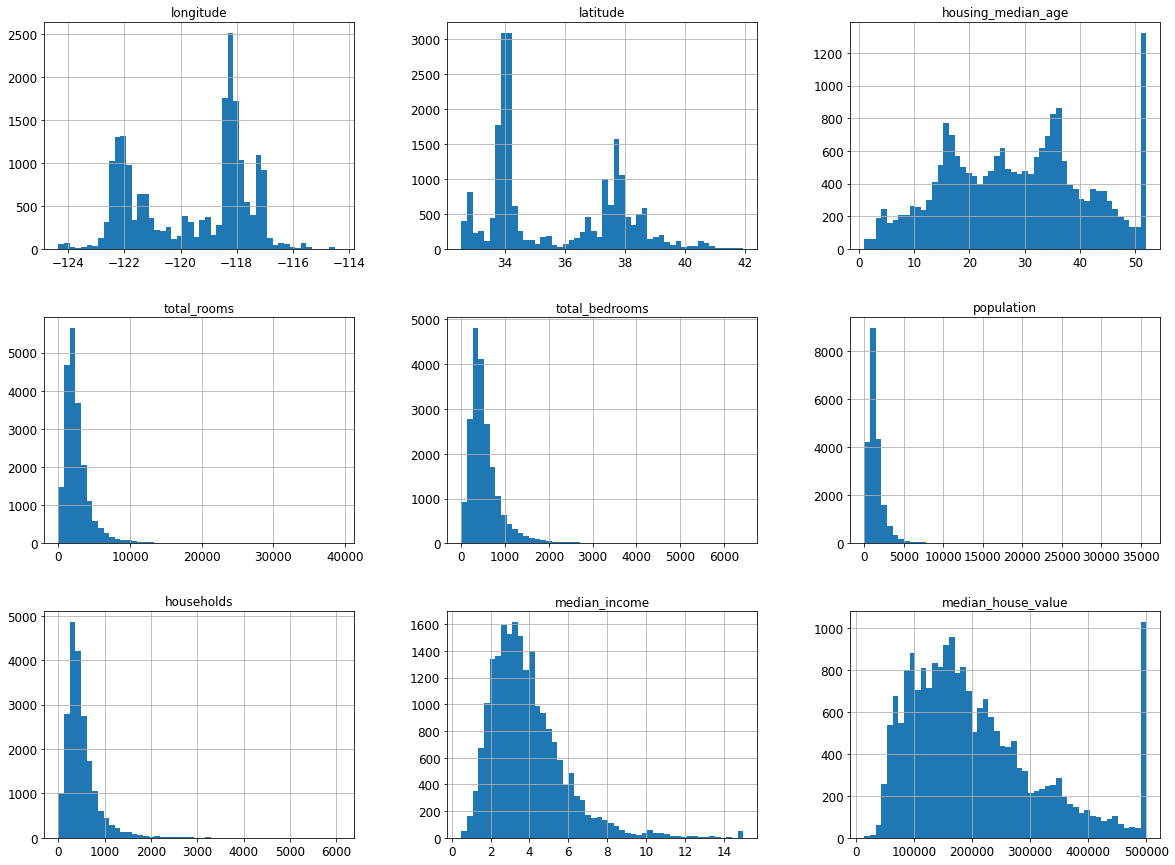

In [ ]:
#Plotting a matplotlib graph for exploring the data
%matplotlib inline
import matplotlib.pyplot as plt

data.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
#Dividing the data into train and test
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data, random_state = 42, test_size = 0.42)

In [ ]:
len(train_data)

11971

In [ ]:
len(test_data)

8669

In [ ]:
data['income_cat'] = pd.cut(data['median_income'], bins = [0,1.5,3,4.5,6,np.inf], labels = [1,2,3,4,5])

(array([ 822.,    0., 6581.,    0.,    0., 7236.,    0., 3639.,    0.,
        2362.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

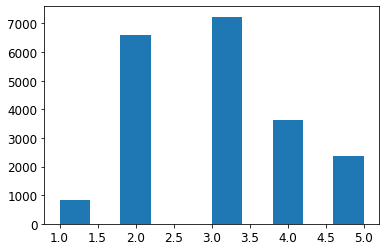

In [ ]:
plt.hist(data['income_cat'])

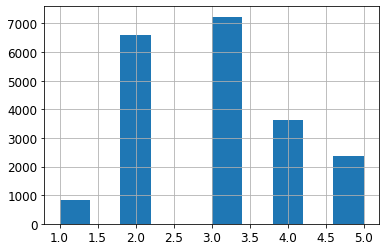

In [ ]:
data['income_cat'].hist()

## Splitting equally on the basis of Income Cateogry

Earlier we were splitting the data, but we were not able to guarantee that the data is splitted as per the income_cat condition.
Hence, we use StratifiedShuffleSplit, which is responsible for taking care for this issue, and we can split as per our requirement.

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=4)

In [ ]:
for train_index, test_index in split.split(data, data['income_cat']):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]


In [ ]:
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
15738,-122.42,37.78,17.0,1257.0,339.0,1093.0,384.0,1.8438,72500.0,NEAR BAY,2
3530,-118.54,34.26,22.0,5303.0,838.0,2372.0,807.0,5.6912,311800.0,<1H OCEAN,4
5949,-117.86,34.14,36.0,3097.0,667.0,1484.0,634.0,3.1905,235300.0,INLAND,3
8420,-118.34,33.93,37.0,1638.0,407.0,1341.0,369.0,3.0677,167700.0,<1H OCEAN,3
2672,-115.62,33.04,17.0,1009.0,231.0,745.0,217.0,2.0463,61200.0,INLAND,2
...,...,...,...,...,...,...,...,...,...,...,...
6471,-118.06,34.09,36.0,1239.0,238.0,717.0,237.0,3.2440,258100.0,<1H OCEAN,3
12046,-117.52,33.88,21.0,722.0,178.0,770.0,165.0,2.5656,102500.0,INLAND,2
1099,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,INLAND,3
15300,-117.36,33.18,26.0,5550.0,1153.0,2372.0,1058.0,2.5509,181800.0,NEAR OCEAN,2


In [ ]:
strat_test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
11365,-117.95,33.74,16.0,2768.0,600.0,1182.0,563.0,3.7162,201200.0,<1H OCEAN,3
13660,-117.32,34.02,17.0,1779.0,292.0,1006.0,293.0,4.6708,123100.0,INLAND,4
19430,-121.06,37.66,6.0,3655.0,598.0,1993.0,596.0,4.6053,150100.0,INLAND,4
15339,-117.31,33.18,16.0,1835.0,430.0,599.0,399.0,2.0147,87700.0,NEAR OCEAN,2
20475,-118.75,34.26,24.0,2234.0,373.0,1325.0,383.0,5.4604,193400.0,<1H OCEAN,4
...,...,...,...,...,...,...,...,...,...,...,...
12880,-121.39,38.64,33.0,1503.0,282.0,652.0,229.0,3.6937,99300.0,INLAND,3
4366,-118.27,34.10,51.0,3149.0,519.0,1082.0,510.0,6.4459,421600.0,<1H OCEAN,5
12998,-121.25,38.68,13.0,503.0,70.0,267.0,77.0,6.1943,276100.0,INLAND,5
9612,-120.47,37.29,16.0,749.0,222.0,1277.0,224.0,1.2054,60900.0,INLAND,1


In [ ]:
strat_test_set['income_cat'].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [ ]:
for set_ in strat_test_set, strat_train_set:
    set_.drop("income_cat", inplace = True, axis =1 )

# Discover and Visualize the Data to Gain Insights

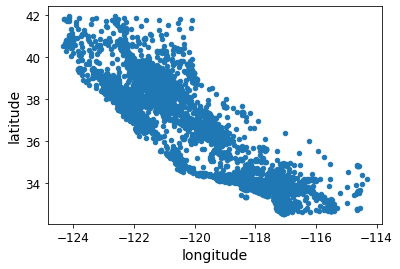

In [ ]:
data.plot(kind='scatter', x='longitude', y='latitude')

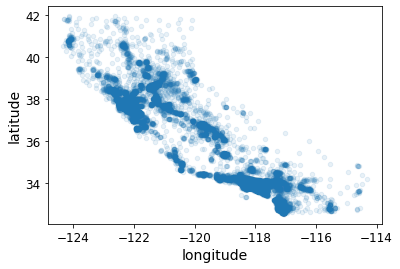

In [ ]:
data.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

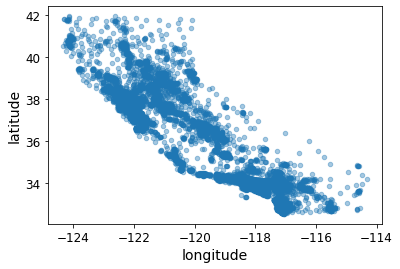

In [ ]:
data.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4)

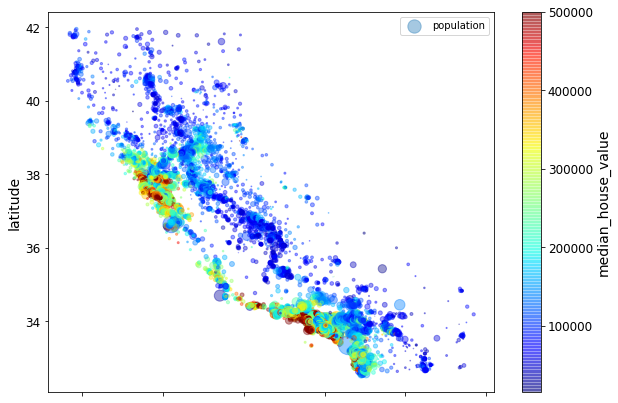

In [ ]:
data.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, s=data['population']/100, label='population', figsize=(10,7), c="median_house_value", cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()